In [1]:
import numpy             as np

from scipy      import fftpack as fft
from matplotlib import pyplot  as plt

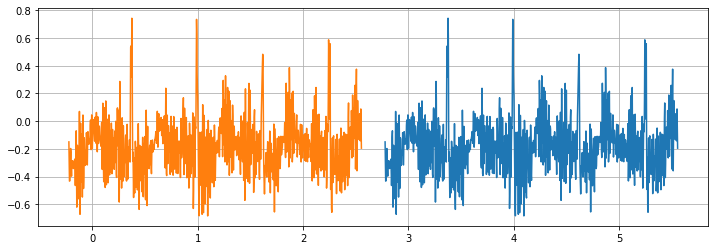

In [2]:
path  = '/home/omarpr/Dropbox/Brain/Data/csv/'
fname = 'ekg_001.csv'

data = np.loadtxt(path+fname,delimiter=',',dtype='str')
ekg  = data.astype('float')[1000:2000]


plt.figure( figsize=(12,4) )
plt.plot( ekg[:,0]  , ekg[:,1] )
plt.plot( ekg[:,0]-3, ekg[:,1] )
plt.grid(True)
plt.show()

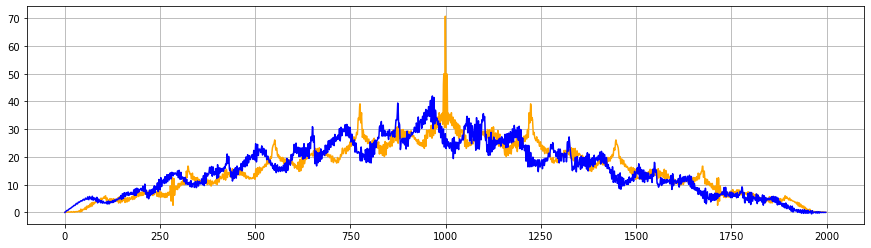

In [3]:
plt.figure( figsize=(15,4) )
plt.plot( np.correlate( ekg[:,1], ekg[:,1], mode='full'), color='orange' )
plt.plot( np.convolve ( ekg[:,1], ekg[:,1], mode='full'), color='blue' )
plt.grid(True)

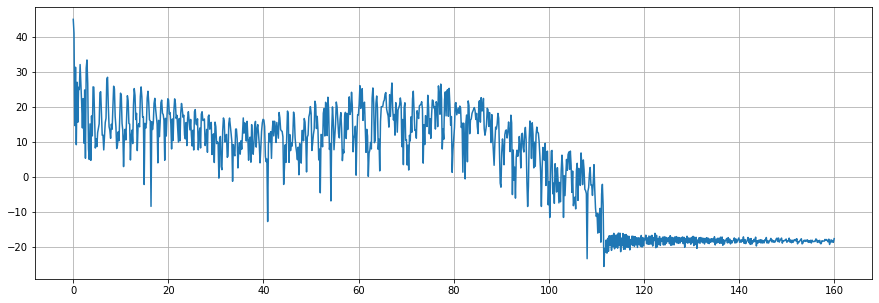

In [4]:
sr      = 320
ekg_fft = fft.fft(  np.correlate( ekg[:,1], ekg[:,1], mode='full')  )

ekg_fft = 10*np.log10(  np.abs(ekg_fft)  )
f       = np.linspace( 0,sr/2,ekg_fft.shape[0]//2 )

plt.figure( figsize=(15,5) )
plt.plot( f,ekg_fft[ :f.shape[0] ] )
plt.grid(True)

## Estimar función de densidad de probabilidad de una señal

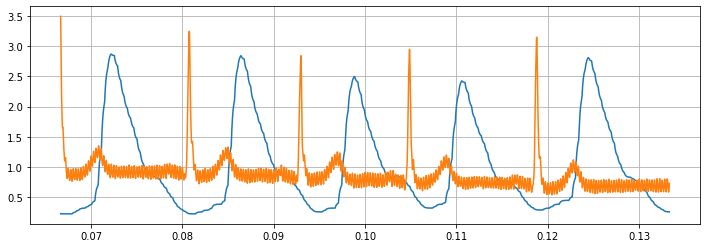

In [5]:
path  = '/home/omarpr/Dropbox/Brain/Data/'
fname = 'rec02_001.txt'

data = np.loadtxt(path+fname,delimiter='\t',dtype='str')
data = data.astype('float')[4000:8000]

plt.figure( figsize=(12,4) )
plt.plot( data[:,0], data[:,4] )
plt.plot( data[:,0], data[:,2] )
plt.grid(True)
plt.show()

(4000, 5)

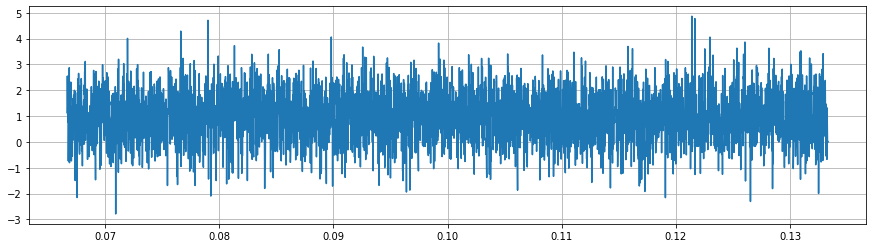

In [6]:
noise = np.random.normal(1,1,data.shape[0])
plt.figure( figsize=(15,4) )
plt.plot( data[:,0], noise )
plt.grid(True)
data.shape

In [8]:
def histogram(s,nbins=10,width=0.5):
    intervals = np.linspace( s.min(), s.max(), nbins+1 ) 
    
    left  = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:,np.newaxis] < intervals[1:] [np.newaxis]
    
    hist = (left*right).sum(axis=0)
    plt.bar( intervals[:-1], hist, width)
    plt.grid(True)
    return( intervals[:-1], hist )

(array([-2.78589614, -2.6644322 , -2.54296826, -2.42150432, -2.30004039,
        -2.17857645, -2.05711251, -1.93564857, -1.81418463, -1.69272069,
        -1.57125675, -1.44979281, -1.32832887, -1.20686493, -1.08540099,
        -0.96393705, -0.84247311, -0.72100917, -0.59954523, -0.47808129,
        -0.35661735, -0.23515341, -0.11368947,  0.00777447,  0.12923841,
         0.25070234,  0.37216628,  0.49363022,  0.61509416,  0.7365581 ,
         0.85802204,  0.97948598,  1.10094992,  1.22241386,  1.3438778 ,
         1.46534174,  1.58680568,  1.70826962,  1.82973356,  1.9511975 ,
         2.07266144,  2.19412538,  2.31558932,  2.43705326,  2.5585172 ,
         2.67998113,  2.80144507,  2.92290901,  3.04437295,  3.16583689,
         3.28730083,  3.40876477,  3.53022871,  3.65169265,  3.77315659,
         3.89462053,  4.01608447,  4.13754841,  4.25901235,  4.38047629,
         4.50194023,  4.62340417,  4.74486811]),
 array([  0,   0,   0,   1,   0,   3,   2,   3,   5,   7,   8,  15,  15,
  

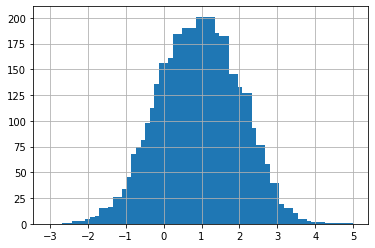

In [11]:
data  = noise
nbins = np.sqrt( data.shape[0] )
histogram(data,nbins=nbins,width=.5)

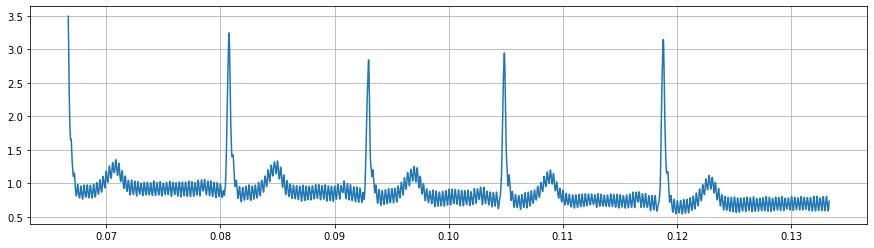

In [30]:
t,s = data[:,0], data[:,2]
plt.figure( figsize=(15,4) )
plt.plot( t,s )
plt.grid(True)

## Media móvil

In [12]:
def segments(s,L=11):
    LEN     = s.shape[0]
    segment = []
    for i in range(LEN-L):
        ep = s[i:i+L]
        segment.append(ep)
    
    segment = np.array(segment)
    return segment.copy()

In [20]:
path  = '/home/omarpr/Dropbox/Brain/Data/'
fname = 'rec02_001.txt'

data = np.loadtxt(path+fname,delimiter='\t',dtype='str')
data = data.astype('float')[4000:8000]

s = data[:,2]
t = np.linspace(0,4,s.shape[0])

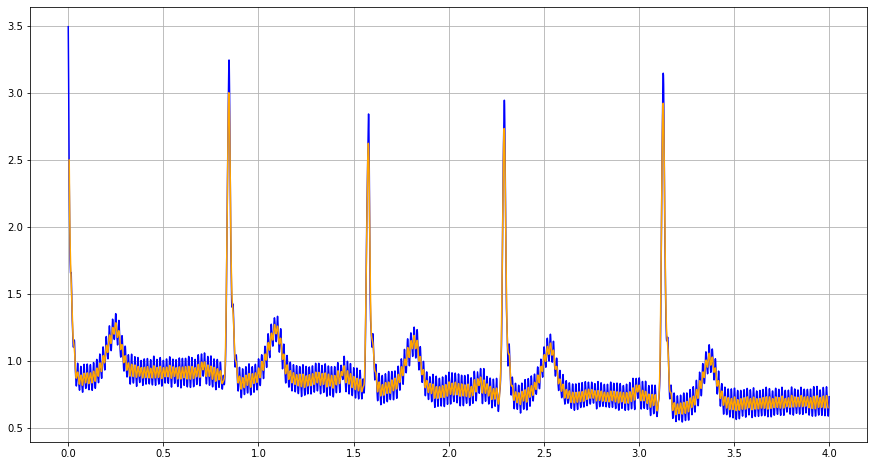

In [62]:
L      = 11
segs   = segments(s,L)
s_mean = segs.mean(axis=1)

plt.figure( figsize=(15,8) )
plt.plot( t            ,s     , color='blue' )
plt.plot( t[L//2:-L//2],s_mean, color='orange')
plt.grid(True)

In [35]:
def gauss_w(sr,L=11):
    n = np.arange(L) - L//2
    n = n/sr
    g = 1/np.sqrt( 2*np.pi ) * np.exp(-0.5*n**2)
    return g

In [66]:
w   = gauss_w(sr,L)
s_g = np.dot(segs,w)/L

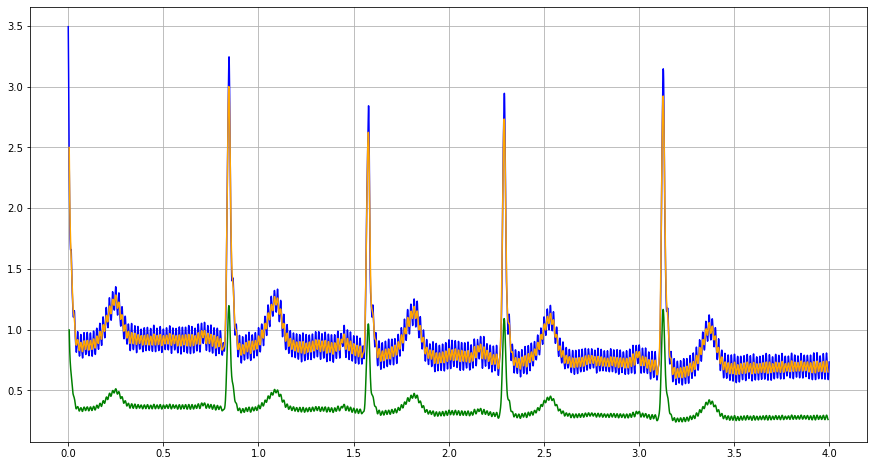

In [67]:
plt.figure( figsize=(15,8) )
plt.plot( t            ,s     , color='blue' )
plt.plot( t[L//2:-L//2],s_mean, color='orange')
plt.plot( t[L//2:-L//2],s_g , color='green')
plt.grid(True)

In [49]:
w

array([0.39889358, 0.39891111, 0.39892475, 0.39893449, 0.39894033,
       0.39894228, 0.39894033, 0.39893449, 0.39892475, 0.39891111,
       0.39889358])

In [36]:
sr = 1000
L  = 31
n  = ( np.arange( L ) - L//2 )
n  = n/sr

w    = np.sqrt(2*np.pi) * np.exp(  -.5*(n)**2  )
segs = segments(s,L)
print(w.shape,segs.shape)

s_mg = np.dot( segs,w[:,np.newaxis] ).flatten()/L
s_m  = segs.mean(axis=1)

(31,) (3969, 31)


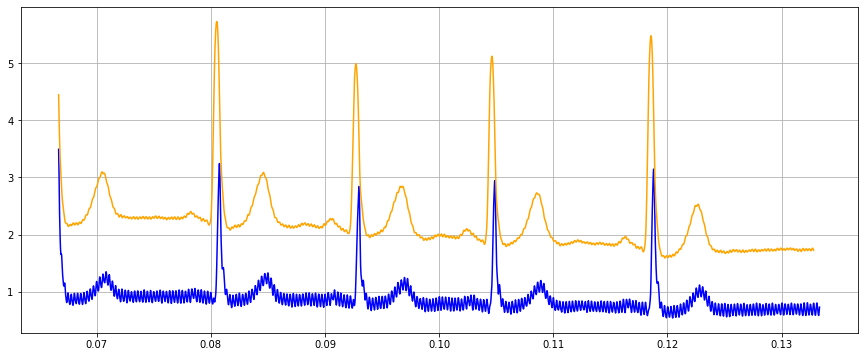

In [37]:
plt.figure( figsize=(15,6) )
plt.plot( t     ,s            , color='blue' )
plt.plot( t[:-L],s_mg, color='orange')
#plt.plot( t[:-L],s_m -s[:-L] , color='green')
plt.grid(True)

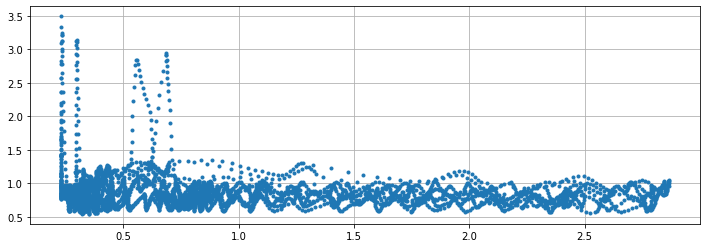

In [6]:
plt.figure( figsize=(12,4) )
plt.plot( data[:,4], data[:,2], '.' )
plt.grid(True)
plt.show()

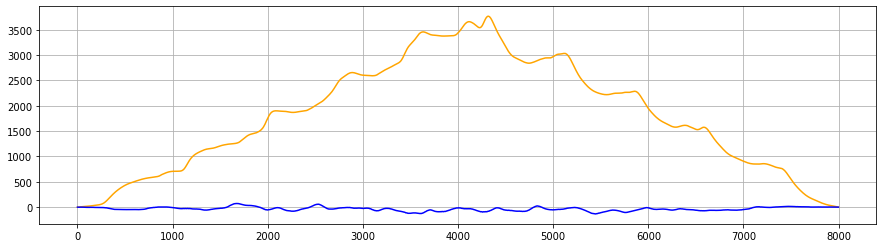

In [7]:
noise = np.random.normal(0,1,data.shape[0])
plt.figure( figsize=(15,4) )
plt.plot( np.correlate( data[:,4], data[:,2], mode='full'), color='orange' )
plt.plot( np.correlate( data[:,4], noise, mode='full'), color='blue' )
plt.grid(True)

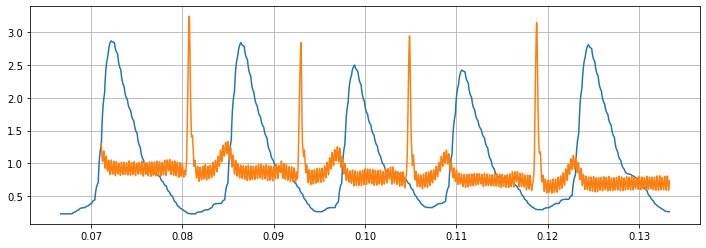

In [8]:
data = np.loadtxt(path+fname,delimiter='\t',dtype='str')
data = data.astype('float')[4000:8000]

S = 265
plt.figure( figsize=(12,4) )
plt.plot( data[:    ,0], data[:    ,4] )
plt.plot( data[S:,0], data[S:,2] )
plt.grid(True)
plt.show()

3634 3457.8565381100516 366


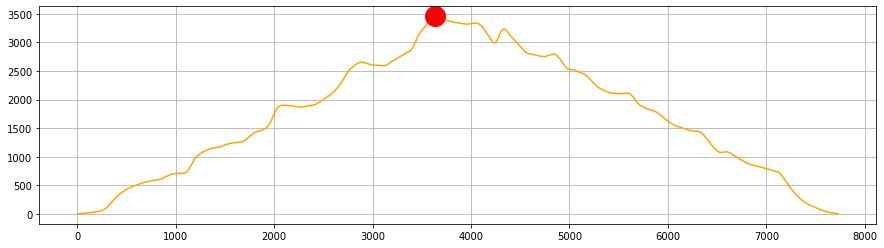

In [9]:
corr = np.correlate( data[:,4], data[S:,2], mode='full')
cmax = np.argmax(corr)

plt.figure( figsize=(15,4) )
plt.plot( corr           ,      color='orange'               )
plt.plot( cmax,corr[cmax], 'o', color='red',   markersize=20 )
plt.grid(True)
print(cmax,corr[cmax],4000-cmax)

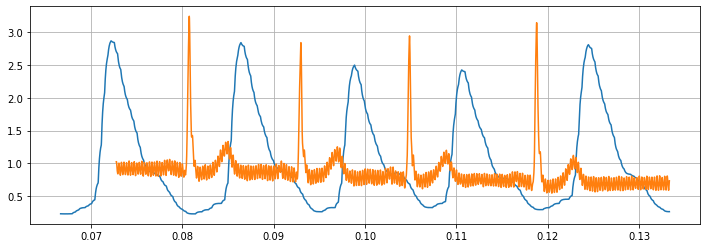

In [10]:
S = 4000-cmax
plt.figure( figsize=(12,4) )
plt.plot( data[:,0], data[:,4] )
plt.plot( data[S:,0], data[S:,2] )
plt.grid(True)
plt.show()